<a href="https://www.kaggle.com/code/shauntingck/nstem-content-pages?scriptVersionId=130930941" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from pandas import DataFrame, concat
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/contentpages/contentPages.xlsx


In [2]:
file_path = r'/kaggle/input/contentpages/contentPages.xlsx'
xls = pd.ExcelFile(r'/kaggle/input/contentpages/contentPages.xlsx')
xls.sheet_names

# Most viewed pages (week)
week_content = pd.read_excel(file_path, sheet_name = "content-pages")

# Total page views (week)
week_user = pd.read_excel(file_path, sheet_name = "Sheet1")

# Most viewed pages (Recent month)
month_content = pd.read_excel(file_path, sheet_name = "Sheet2")

# Total page views (Recent month)
month_user = pd.read_excel(file_path, sheet_name = "Sheet3")

# Most viewed pages (Past months)
month6_content = pd.read_excel(file_path, sheet_name = "Sheet4")

# Total page views (Past months)
month6_user = pd.read_excel(file_path, sheet_name = "Sheet5")



# 1. Week

In [3]:
week_content.head()

,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
0,/,597,387,00:00:55,331,0.3625,0.2797,0
1,/internships/,356,229,00:00:53,193,0.3109,0.2612,0
2,/internships/internship-application/,200,184,00:03:23,76,0.8553,0.7500,0
3,/internships/meet-our-interns/,173,156,00:02:59,127,0.8661,0.7688,0
4,/start-a-chapter/,127,104,00:01:01,15,0.4667,0.2913,0


In [4]:
# Seperate the last row as a row that stores the totals
week_total = week_content.drop(week_content.index[0:10])
week_total

# Exclude the last row
week_content = week_content.drop(week_content.index[10:11])
week_content

,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
0,/,597,387,00:00:55,331,0.3625,0.2797,0
1,/internships/,356,229,00:00:53,193,0.3109,0.2612,0
2,/internships/internship-application/,200,184,00:03:23,76,0.8553,0.7500,0
3,/internships/meet-our-interns/,173,156,00:02:59,127,0.8661,0.7688,0
4,/start-a-chapter/,127,104,00:01:01,15,0.4667,0.2913,0
5,/high-school-grades-9-12/,114,103,00:01:02,17,0.8824,0.5263,0
6,/dashboard/,71,42,00:00:57,1,0.0000,0.0423,0
7,/requirements/,71,66,00:02:16,31,0.7419,0.6197,0
8,/internships/testimonials/,64,31,00:00:27,30,0.2000,0.3750,0
9,/log-in/,54,41,00:00:50,5,0.4000,0.0741,0


In [5]:
# Basic description of each variable
week_content.describe()

,Pageviews,Unique Pageviews,Entrances,Bounce Rate,% Exit,Page Value
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.0
mean,182.700000,134.300000,82.600000,0.508580,0.398840,0.0
std,171.755673,110.666717,106.920739,0.310922,0.258856,0.0
min,54.000000,31.000000,1.000000,0.000000,0.042300,0.0
25%,71.000000,48.000000,15.500000,0.323800,0.265825,0.0
50%,120.500000,103.500000,30.500000,0.433350,0.333150,0.0
75%,193.250000,177.000000,114.250000,0.826950,0.596350,0.0
max,597.000000,387.000000,331.000000,0.882400,0.768800,0.0


High variation for all variables 

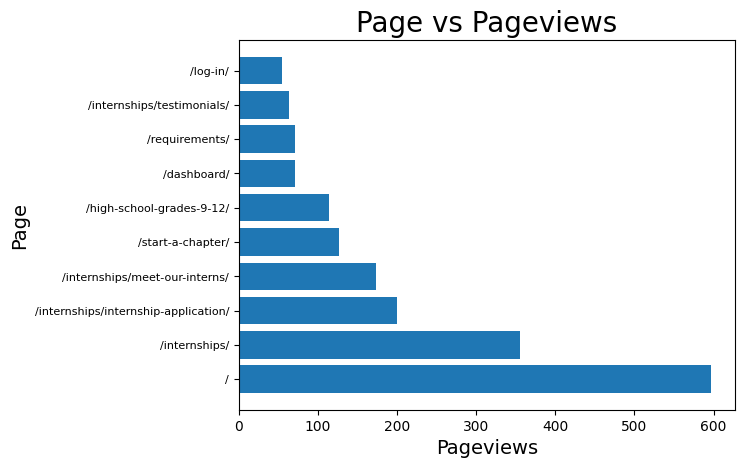

In [6]:
plt.barh(week_content['Page'], week_content['Pageviews'])
plt.yticks(week_content['Page'], rotation = 'horizontal', size = 8)
plt.xlabel('Pageviews', fontsize=14)
plt.ylabel('Page', fontsize=14)
plt.title('Page vs Pageviews', fontsize=20)
plt.show()

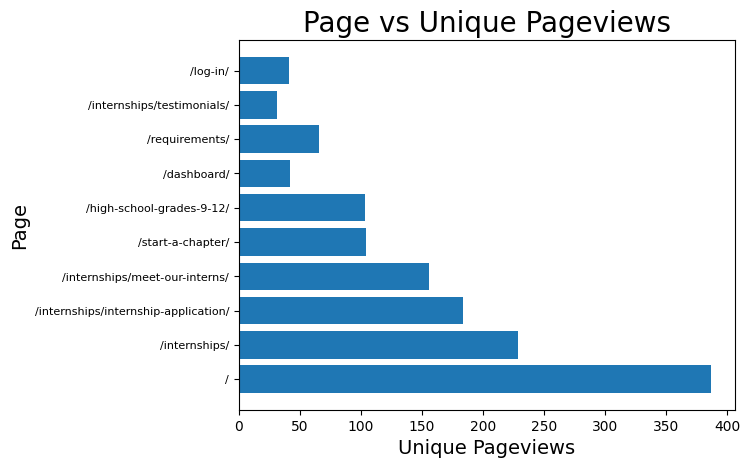

In [7]:
plt.barh(week_content['Page'], week_content['Unique Pageviews'])
plt.yticks(week_content['Page'], rotation = 'horizontal', size = 8)
plt.xlabel('Unique Pageviews', fontsize=14)
plt.ylabel('Page', fontsize=14)
plt.title('Page vs Unique Pageviews', fontsize=20)
plt.show()

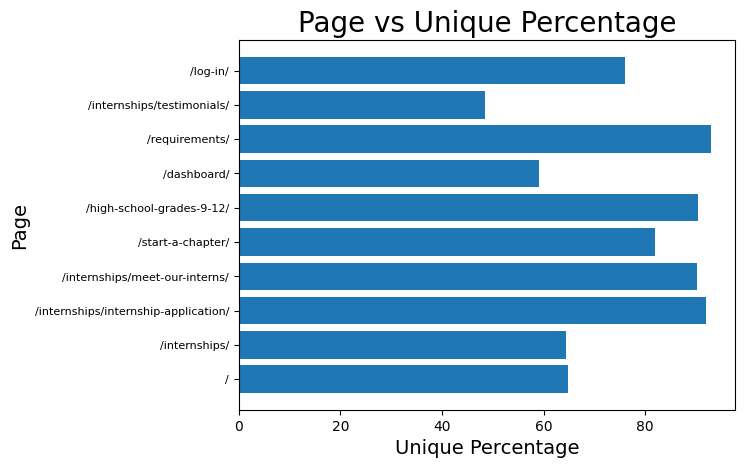

In [8]:
percent_unique = week_content['Unique Pageviews']/week_content['Pageviews']*100
percent_unique
plt.barh(week_content['Page'], percent_unique)
plt.yticks(week_content['Page'], rotation = 'horizontal', size = 8)
plt.xlabel('Unique Percentage', fontsize=14)
plt.ylabel('Page', fontsize=14)
plt.title('Page vs Unique Percentage', fontsize=20)
plt.show()

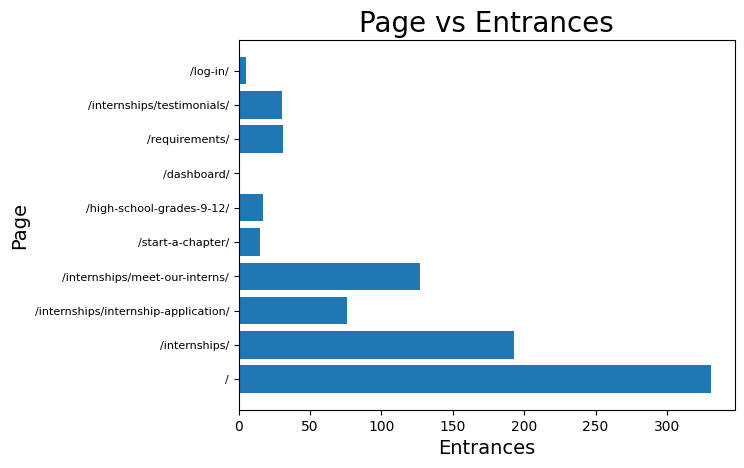

In [9]:
plt.barh(week_content['Page'], week_content['Entrances'])
plt.yticks(week_content['Page'], rotation = 'horizontal', size = 8)
plt.xlabel('Entrances', fontsize=14)
plt.ylabel('Page', fontsize=14)
plt.title('Page vs Entrances', fontsize=20)
plt.show()

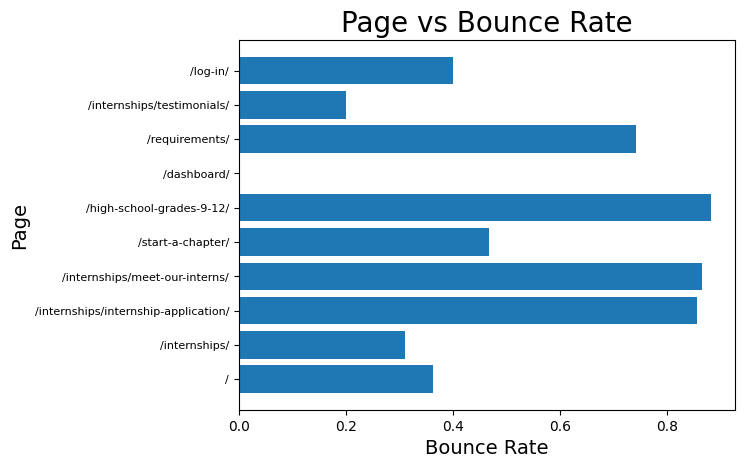

In [10]:
plt.barh(week_content['Page'], week_content['Bounce Rate'])
plt.yticks(week_content['Page'], rotation = 'horizontal', size = 8)
plt.xlabel('Bounce Rate', fontsize=14)
plt.ylabel('Page', fontsize=14)
plt.title('Page vs Bounce Rate', fontsize=20)
plt.show()

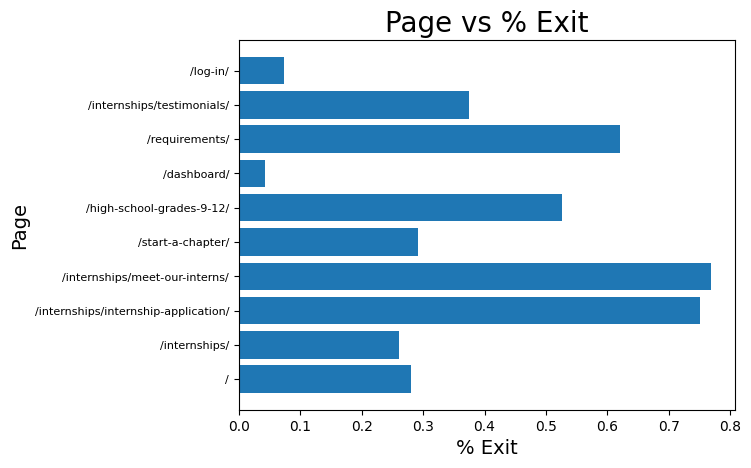

In [11]:
plt.barh(week_content['Page'], week_content['% Exit'])
plt.yticks(week_content['Page'], rotation = 'horizontal', size = 8)
plt.xlabel('% Exit', fontsize=14)
plt.ylabel('Page', fontsize=14)
plt.title('Page vs % Exit', fontsize=20)
plt.show()

In [12]:
week_user['day_of_week'] = week_user['Day Index'].dt.day_name()
week_user = week_user.drop(week_user.index[7:9])
week_user

,Day Index,Pageviews,day_of_week
0,2023-04-30,328,Sunday
1,2023-05-01,581,Monday
2,2023-05-02,678,Tuesday
3,2023-05-03,584,Wednesday
4,2023-05-04,346,Thursday
5,2023-05-05,410,Friday
6,2023-05-06,137,Saturday


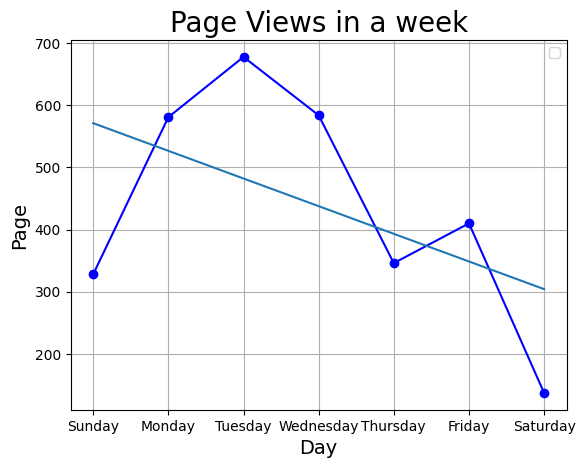

In [13]:
import matplotlib.dates as mdates

x_values = (week_user['Day Index'] - week_user['Day Index'].min()).dt.days
y_values = week_user['Pageviews']

plt.plot(week_user['day_of_week'], week_user['Pageviews'], color='blue', marker='o')
plt.title('Page Views in a week', fontsize=20)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Page', fontsize=14)
plt.grid(True)

# Fit a linear regression line
a, b = np.polyfit(x_values, y_values, 1)
plt.plot(x_values, a * x_values + b) 
plt.legend()
plt.show()


# 2. Recent Month

In [14]:
# Seperate the last row as a row that stores the totals
month_total = month_content.drop(month_content.index[0:10])

# Exclude the last row
month_content = month_content.drop(month_content.index[10:11])
month_content.head()

,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
0,/internships/,1666,1097,00:00:59,925,0.3276,0.2731,0
1,/,1589,1209,00:01:11,995,0.3960,0.3298,0
2,/internships/internship-application/,980,877,00:04:17,408,0.8407,0.7480,0
3,/internships/meet-our-interns/,449,394,00:03:13,298,0.8221,0.6637,0
4,/start-a-chapter/,400,341,00:01:20,74,0.5000,0.3300,0


In [15]:
# Basic description of each variable
month_content.describe()

,Pageviews,Unique Pageviews,Entrances,Bounce Rate,% Exit,Page Value
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.0
mean,618.300000,474.700000,289.700000,0.559150,0.408030,0.0
std,581.393928,421.588807,376.430619,0.201999,0.184172,0.0
min,200.000000,86.000000,23.000000,0.304300,0.215000,0.0
25%,219.500000,190.250000,43.750000,0.411875,0.286350,0.0
50%,321.000000,276.000000,61.000000,0.510850,0.329900,0.0
75%,847.250000,756.250000,380.500000,0.750750,0.506150,0.0
max,1666.000000,1209.000000,995.000000,0.840700,0.748000,0.0


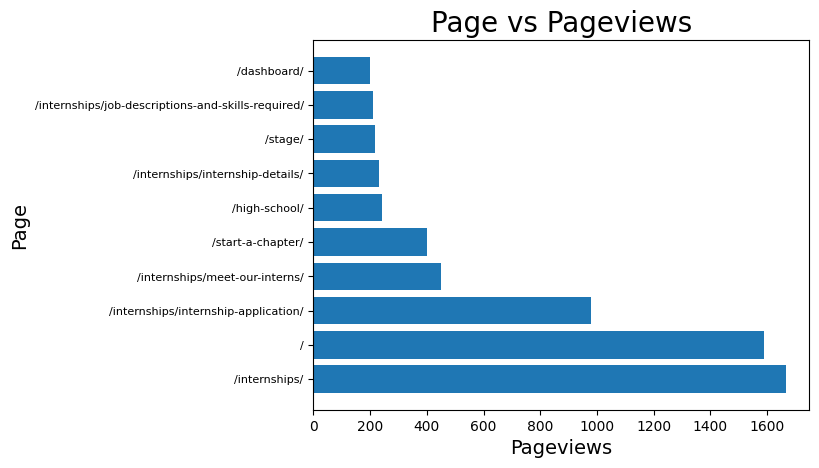

In [16]:
plt.barh(month_content['Page'], month_content['Pageviews'])
plt.yticks(month_content['Page'], rotation='horizontal', size=8)
plt.xlabel('Pageviews', fontsize=14)
plt.ylabel('Page', fontsize=14)
plt.title('Page vs Pageviews', fontsize=20)
plt.show()

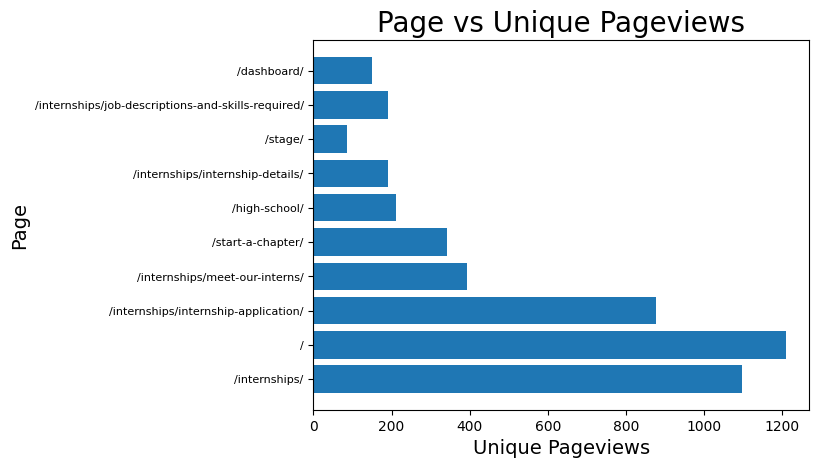

In [17]:
plt.barh(month_content['Page'], month_content['Unique Pageviews'])
plt.yticks(month_content['Page'], rotation='horizontal', size=8)
plt.xlabel('Unique Pageviews', fontsize=14)
plt.ylabel('Page', fontsize=14)
plt.title('Page vs Unique Pageviews', fontsize=20)
plt.show()

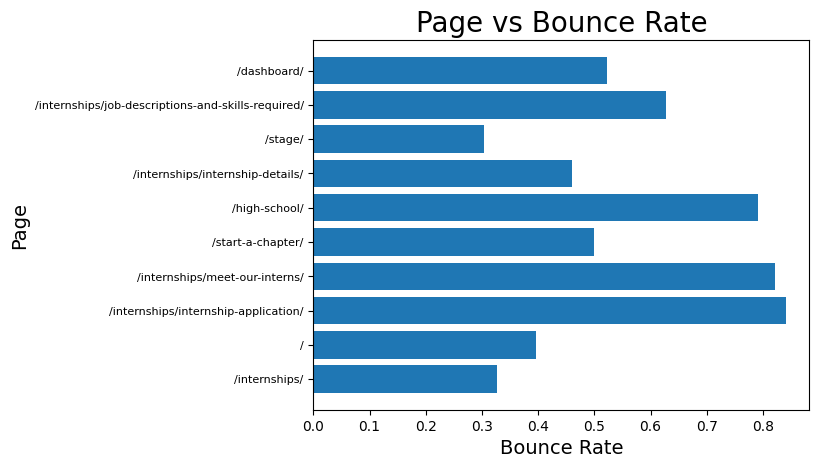

In [18]:
plt.barh(month_content['Page'], month_content['Bounce Rate'])
plt.yticks(month_content['Page'], rotation='horizontal', size=8)
plt.xlabel('Bounce Rate', fontsize=14)
plt.ylabel('Page', fontsize=14)
plt.title('Page vs Bounce Rate', fontsize=20)
plt.show()

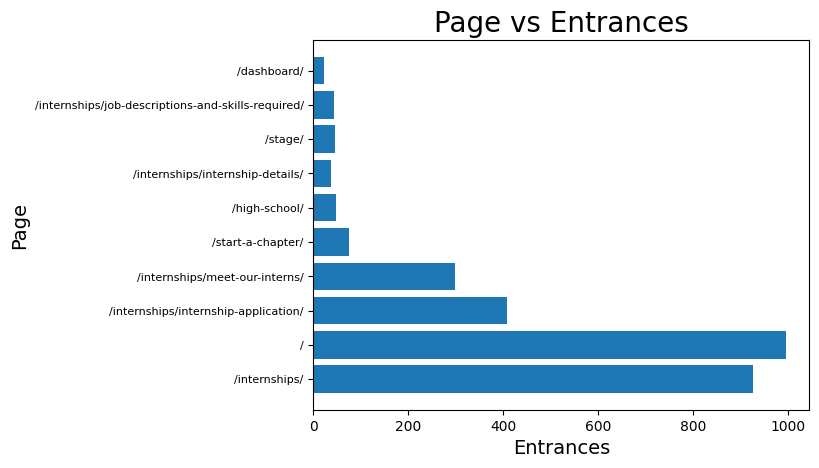

In [19]:
plt.barh(month_content['Page'], month_content['Entrances'])
plt.yticks(month_content['Page'], rotation='horizontal', size=8)
plt.xlabel('Entrances', fontsize=14)
plt.ylabel('Page', fontsize=14)
plt.title('Page vs Entrances', fontsize=20)
plt.show()

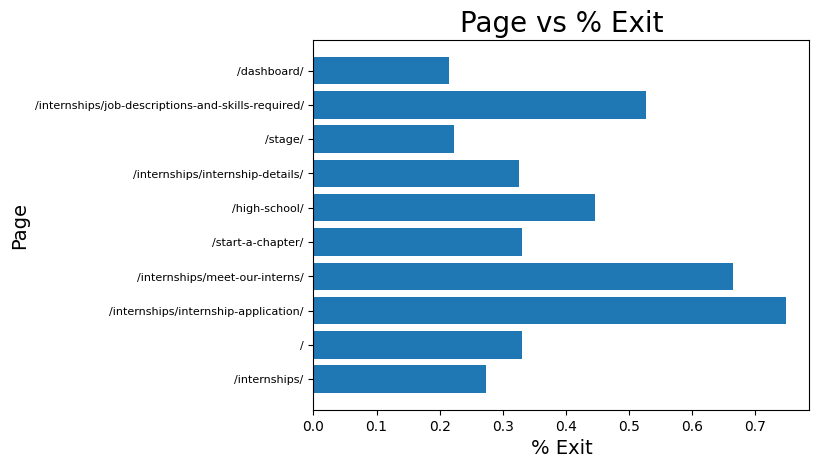

In [20]:
plt.barh(month_content['Page'], month_content['% Exit'])
plt.yticks(month_content['Page'], rotation='horizontal', size=8)
plt.xlabel('% Exit', fontsize=14)
plt.ylabel('Page', fontsize=14)
plt.title('Page vs % Exit', fontsize=20)
plt.show()

In [21]:
month_user['day_of_week'] = month_user['Day Index'].dt.day_name()
month_user = month_user.drop(month_user.index[30:31])
month_user.head()
month_user.dtypes

Day Index      datetime64[ns]
Pageviews               int64
day_of_week            object
dtype: object

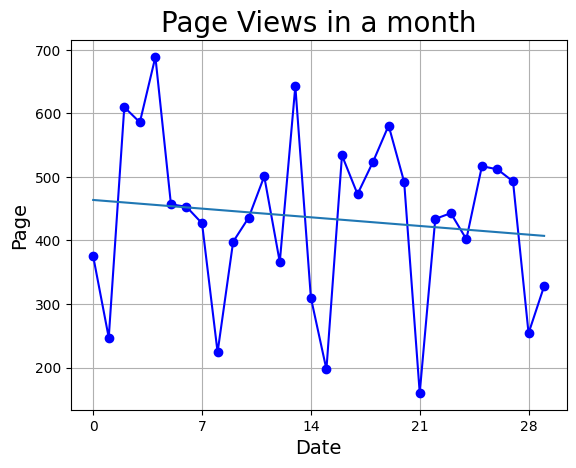

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the chart
x_values = (month_user['Day Index'] - month_user['Day Index'].min()).dt.days
y_values = month_user['Pageviews']

# Create the plot
plt.plot(x_values, y_values, color='blue', marker='o')

# Adjust the x-axis tick labels
plt.xticks(x_values[::7])  # Show every 7th tick label

# Add labels and title
plt.title('Page Views in a month', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Page', fontsize=14)
plt.grid(True)

# Fit a linear regression line
a, b = np.polyfit(x_values, y_values, 1)
plt.plot(x_values, a*x_values+b)        

# Show the plot
plt.show()


# 3. Past Months 

In [23]:
# Seperate the last row as a row that stores the totals
month6_total = month6_content.drop(month6_content.index[0:10])

# Exclude the last row
month6_content = month6_content.drop(month6_content.index[10:11])
month6_content.head()

,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
0,/,8096,5935,00:01:14,5017,0.3885,0.3337,0
1,/internships,3974,2694,00:01:05,2382,0.4299,0.3606,0
2,/internships/,2964,1941,00:00:59,1615,0.3362,0.2696,0
3,/internships/internship-application/,1873,1694,00:04:28,830,0.8193,0.7549,0
4,/internships/internship-application,1805,1657,00:04:17,732,0.8402,0.7668,0


In [24]:
# Basic description of each variable
month_content.describe()

,Pageviews,Unique Pageviews,Entrances,Bounce Rate,% Exit,Page Value
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.0
mean,618.300000,474.700000,289.700000,0.559150,0.408030,0.0
std,581.393928,421.588807,376.430619,0.201999,0.184172,0.0
min,200.000000,86.000000,23.000000,0.304300,0.215000,0.0
25%,219.500000,190.250000,43.750000,0.411875,0.286350,0.0
50%,321.000000,276.000000,61.000000,0.510850,0.329900,0.0
75%,847.250000,756.250000,380.500000,0.750750,0.506150,0.0
max,1666.000000,1209.000000,995.000000,0.840700,0.748000,0.0


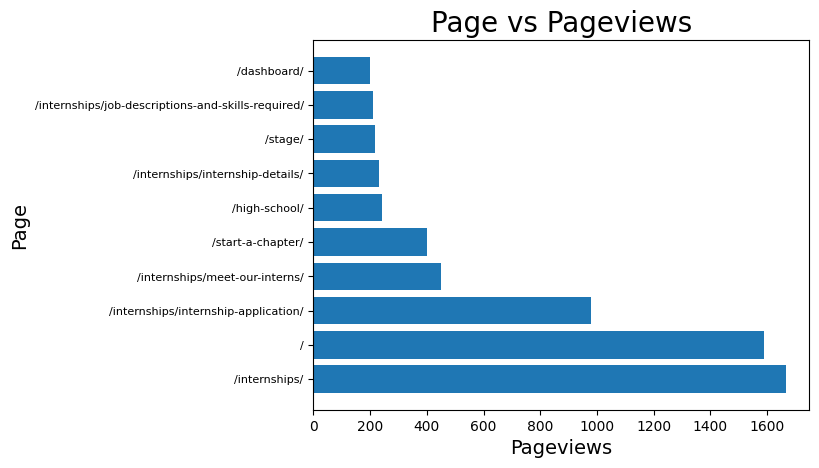

In [25]:
plt.barh(month_content['Page'], month_content['Pageviews'])
plt.yticks(month_content['Page'], rotation='horizontal', size=8)
plt.xlabel('Pageviews', fontsize=14)
plt.ylabel('Page', fontsize=14)
plt.title('Page vs Pageviews', fontsize=20)
plt.show()

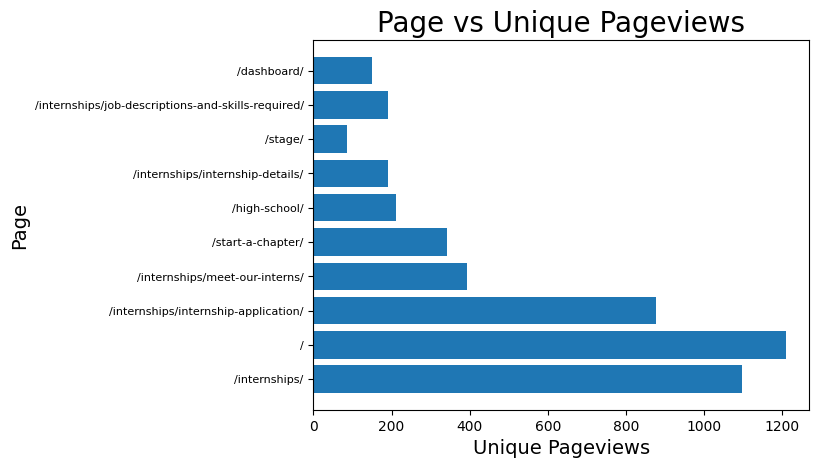

In [26]:
plt.barh(month_content['Page'], month_content['Unique Pageviews'])
plt.yticks(month_content['Page'], rotation='horizontal', size=8)
plt.xlabel('Unique Pageviews', fontsize=14)
plt.ylabel('Page', fontsize=14)
plt.title('Page vs Unique Pageviews', fontsize=20)
plt.show()

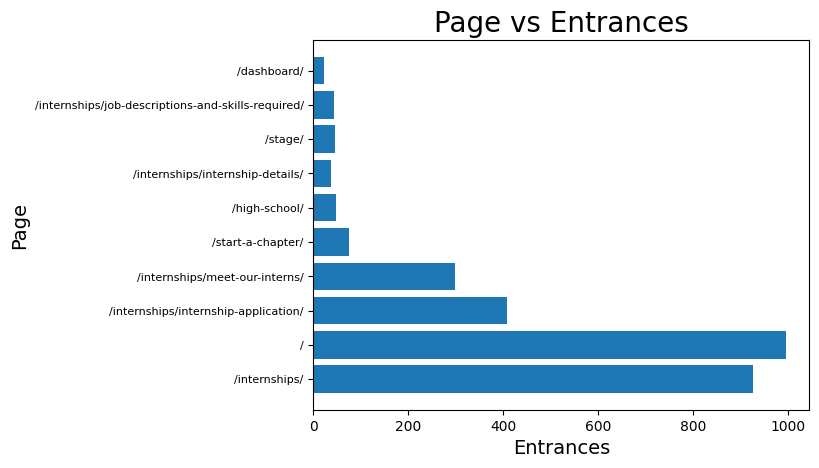

In [27]:
plt.barh(month_content['Page'], month_content['Entrances'])
plt.yticks(month_content['Page'], rotation='horizontal', size=8)
plt.xlabel('Entrances', fontsize=14)
plt.ylabel('Page', fontsize=14)
plt.title('Page vs Entrances', fontsize=20)
plt.show()

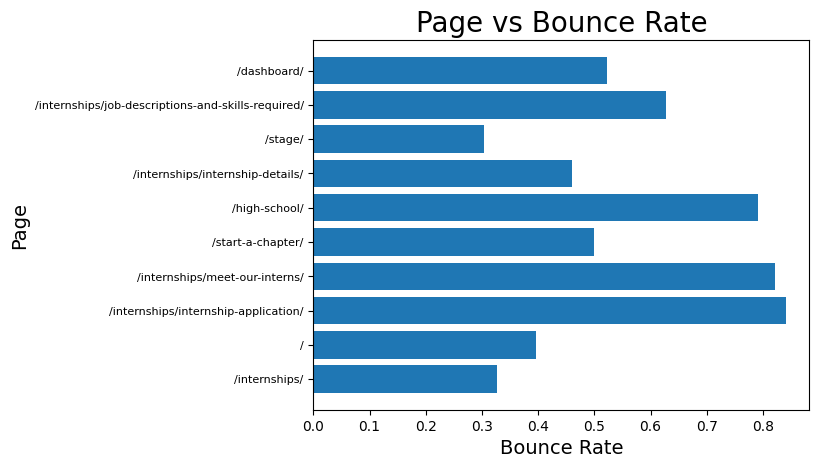

In [28]:
plt.barh(month_content['Page'], month_content['Bounce Rate'])
plt.yticks(month_content['Page'], rotation='horizontal', size=8)
plt.xlabel('Bounce Rate', fontsize=14)
plt.ylabel('Page', fontsize=14)
plt.title('Page vs Bounce Rate', fontsize=20)
plt.show()

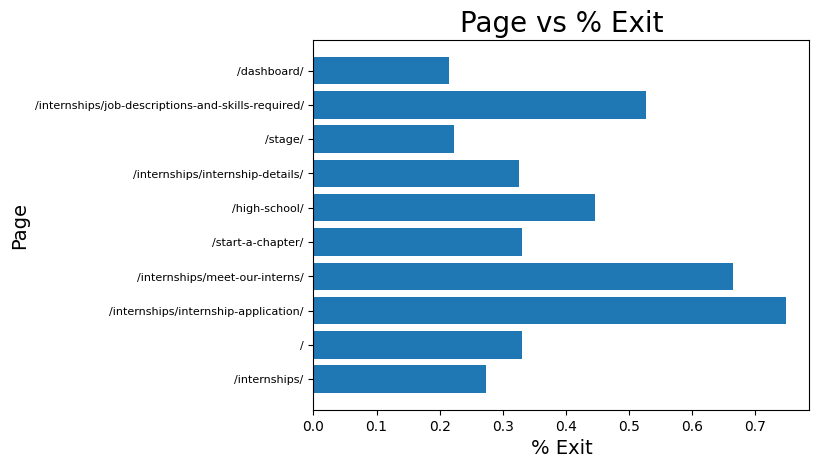

In [29]:
plt.barh(month_content['Page'], month_content['% Exit'])
plt.yticks(month_content['Page'], rotation='horizontal', size=8)
plt.xlabel('% Exit', fontsize=14)
plt.ylabel('Page', fontsize=14)
plt.title('Page vs % Exit', fontsize=20)
plt.show()

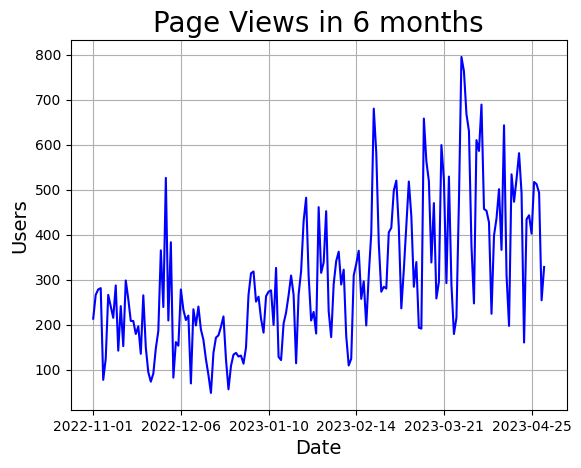

In [30]:
# Data for the chart
x_values = month6_user['Day Index']
y_values = month6_user['Pageviews']

# Create the plot
plt.plot(x_values, y_values, color='blue')

# Adjust the x-axis tick labels
plt.xticks(x_values[::35])  # Show every 7th tick label

# Add labels and title
plt.title('Page Views in 6 months', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Users', fontsize=14)
plt.grid(True)


# Show the plot
plt.show()